In [120]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [121]:
# Get the current working directory
current_directory = os.getcwd()
print("Current directory:", current_directory)

# Move one directory up
parent_directory = os.path.abspath(os.path.join(current_directory, ".."))
csv_path=os.path.join(parent_directory,"EDA","Transformed_Data","EDA.csv")
csv_path

Current directory: g:\Resume_Projects\Regression\Shipment_MLOPS\EDA\Model Loop


'g:\\Resume_Projects\\Regression\\Shipment_MLOPS\\EDA\\EDA\\Transformed_Data\\EDA.csv'

In [122]:
df=pd.read_csv(csv_path)

In [123]:
df.head()

,Country,Managed_By,Fulfill_Via,Vendor_INCO_Term,Shipment_Mode,Product_Group,Sub_Classification,Vendor,Brand,Dosage_Form,Unit_of_Measure_(Per_Pack),Line_Item_Quantity,Line_Item_Value,Pack_Price,Unit_Price,First_Line_Designation,Line_Item_Insurance_(USD),Freight_Cost_USD_Clean,Weight_Kilograms_Clean,Manufacturing_Location
0,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,HRDT,HIV,Others,Others,Test kit,30,19,551.0,29.00,0.97,Yes,47.04,780.34,13.0,Others
1,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Pediatric,Aurobindo Pharma Limited,Generic,Oral,240,1000,6200.0,6.20,0.03,Yes,47.04,4521.50,358.0,India
2,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,HRDT,HIV,Others,Determine,Test kit,100,500,40000.0,80.00,0.80,Yes,47.04,1653.78,171.0,Others
3,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Adult,Others,Generic,Tablet,60,31920,127360.8,3.99,0.07,Yes,47.04,16007.06,1855.0,India
4,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Adult,Aurobindo Pharma Limited,Generic,Capsule,60,38000,121600.0,3.20,0.05,Yes,47.04,45450.08,7590.0,India


In [124]:
df.columns

Index(['Country', 'Managed_By', 'Fulfill_Via', 'Vendor_INCO_Term',
       'Shipment_Mode', 'Product_Group', 'Sub_Classification', 'Vendor',
       'Brand', 'Dosage_Form', 'Unit_of_Measure_(Per_Pack)',
       'Line_Item_Quantity', 'Line_Item_Value', 'Pack_Price', 'Unit_Price',
       'First_Line_Designation', 'Line_Item_Insurance_(USD)',
       'Freight_Cost_USD_Clean', 'Weight_Kilograms_Clean',
       'Manufacturing_Location'],
      dtype='object')

In [125]:
def separate_numerical_categorical_columns(df):
    """
    Separate numerical and categorical columns from the DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - numerical_columns: list of numerical column names
    - categorical_columns: list of categorical column names
    """
    numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

    return numerical_columns, categorical_columns

numerical_columns, categorical_columns=separate_numerical_categorical_columns(df=df)

In [126]:
numerical_columns

['Unit_of_Measure_(Per_Pack)',
 'Line_Item_Quantity',
 'Line_Item_Value',
 'Pack_Price',
 'Unit_Price',
 'Line_Item_Insurance_(USD)',
 'Freight_Cost_USD_Clean',
 'Weight_Kilograms_Clean']

In [127]:
df[numerical_columns]

,Unit_of_Measure_(Per_Pack),Line_Item_Quantity,Line_Item_Value,Pack_Price,Unit_Price,Line_Item_Insurance_(USD),Freight_Cost_USD_Clean,Weight_Kilograms_Clean
0,30,19,551.00,29.00,0.97,47.04,780.34,13.0
1,240,1000,6200.00,6.20,0.03,47.04,4521.50,358.0
2,100,500,40000.00,80.00,0.80,47.04,1653.78,171.0
3,60,31920,127360.80,3.99,0.07,47.04,16007.06,1855.0
4,60,38000,121600.00,3.20,0.05,47.04,45450.08,7590.0
...,...,...,...,...,...,...,...,...
8488,60,15000,97800.00,6.52,0.11,115.11,3410.00,1547.0
8489,30,6724,20978.88,3.12,0.10,24.69,47281.56,6183.0
8490,60,205243,738874.80,3.60,0.06,869.66,46111.55,25880.0
8491,60,166571,599655.60,3.60,0.06,705.79,46111.55,25880.0


Categorical Columns

In [128]:
for column in categorical_columns:
    unique_count = df[column].nunique()
    print(f"Column '{column}' has {unique_count} unique values.")

Column 'Country' has 10 unique values.
Column 'Managed_By' has 2 unique values.
Column 'Fulfill_Via' has 2 unique values.
Column 'Vendor_INCO_Term' has 8 unique values.
Column 'Shipment_Mode' has 4 unique values.
Column 'Product_Group' has 5 unique values.
Column 'Sub_Classification' has 5 unique values.
Column 'Vendor' has 8 unique values.
Column 'Brand' has 4 unique values.
Column 'Dosage_Form' has 5 unique values.
Column 'First_Line_Designation' has 2 unique values.
Column 'Manufacturing_Location' has 9 unique values.


In [130]:
# Use pd.get_dummies() for one-hot encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype=int)

In [131]:
df

,Unit_of_Measure_(Per_Pack),Line_Item_Quantity,Line_Item_Value,Pack_Price,Unit_Price,Line_Item_Insurance_(USD),Freight_Cost_USD_Clean,Weight_Kilograms_Clean,Country_Haiti,Country_Mozambique,...,Dosage_Form_Test kit,First_Line_Designation_Yes,Manufacturing_Location_Inc.,Manufacturing_Location_India,Manufacturing_Location_Japan,Manufacturing_Location_Korea,Manufacturing_Location_Others,Manufacturing_Location_Plc,Manufacturing_Location_SA,Manufacturing_Location_UK
0,30,19,551.00,29.00,0.97,47.04,780.34,13.0,0,0,...,1,1,0,0,0,0,1,0,0,0
1,240,1000,6200.00,6.20,0.03,47.04,4521.50,358.0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,100,500,40000.00,80.00,0.80,47.04,1653.78,171.0,0,0,...,1,1,0,0,0,0,1,0,0,0
3,60,31920,127360.80,3.99,0.07,47.04,16007.06,1855.0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,60,38000,121600.00,3.20,0.05,47.04,45450.08,7590.0,0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8488,60,15000,97800.00,6.52,0.11,115.11,3410.00,1547.0,0,0,...,0,1,0,1,0,0,0,0,0,0
8489,30,6724,20978.88,3.12,0.10,24.69,47281.56,6183.0,0,0,...,0,0,0,1,0,0,0,0,0,0
8490,60,205243,738874.80,3.60,0.06,869.66,46111.55,25880.0,0,0,...,0,0,0,1,0,0,0,0,0,0
8491,60,166571,599655.60,3.60,0.06,705.79,46111.55,25880.0,0,0,...,0,0,0,1,0,0,0,0,0,0


Train Test Split

In [132]:
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X is your feature matrix and y is your target variable
X = df.drop('Freight_Cost_USD_Clean', axis=1)  # Features (excluding the target column)
y=pd.DataFrame()
y['Freight_Cost_USD_Clean'] = df['Freight_Cost_USD_Clean']  # Target variable



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Check the shapes of the resulting sets
print("Training set - X shape:", X_train.shape)
print("Training set - y shape:", y_train.shape)
print("Testing set - X shape:", X_test.shape)
print("Testing set - y shape:", y_test.shape)

Training set - X shape: (7219, 59)
Training set - y shape: (7219, 1)
Testing set - X shape: (1274, 59)
Testing set - y shape: (1274, 1)


In [133]:
numerical_columns=['Unit_of_Measure_(Per_Pack)',
 'Line_Item_Quantity',
 'Line_Item_Value',
 'Pack_Price',
 'Unit_Price',
 'Line_Item_Insurance_(USD)',
 'Weight_Kilograms_Clean']

In [134]:
target_column='Freight_Cost_USD_Clean'

#### Q Q plot

 Train Data 


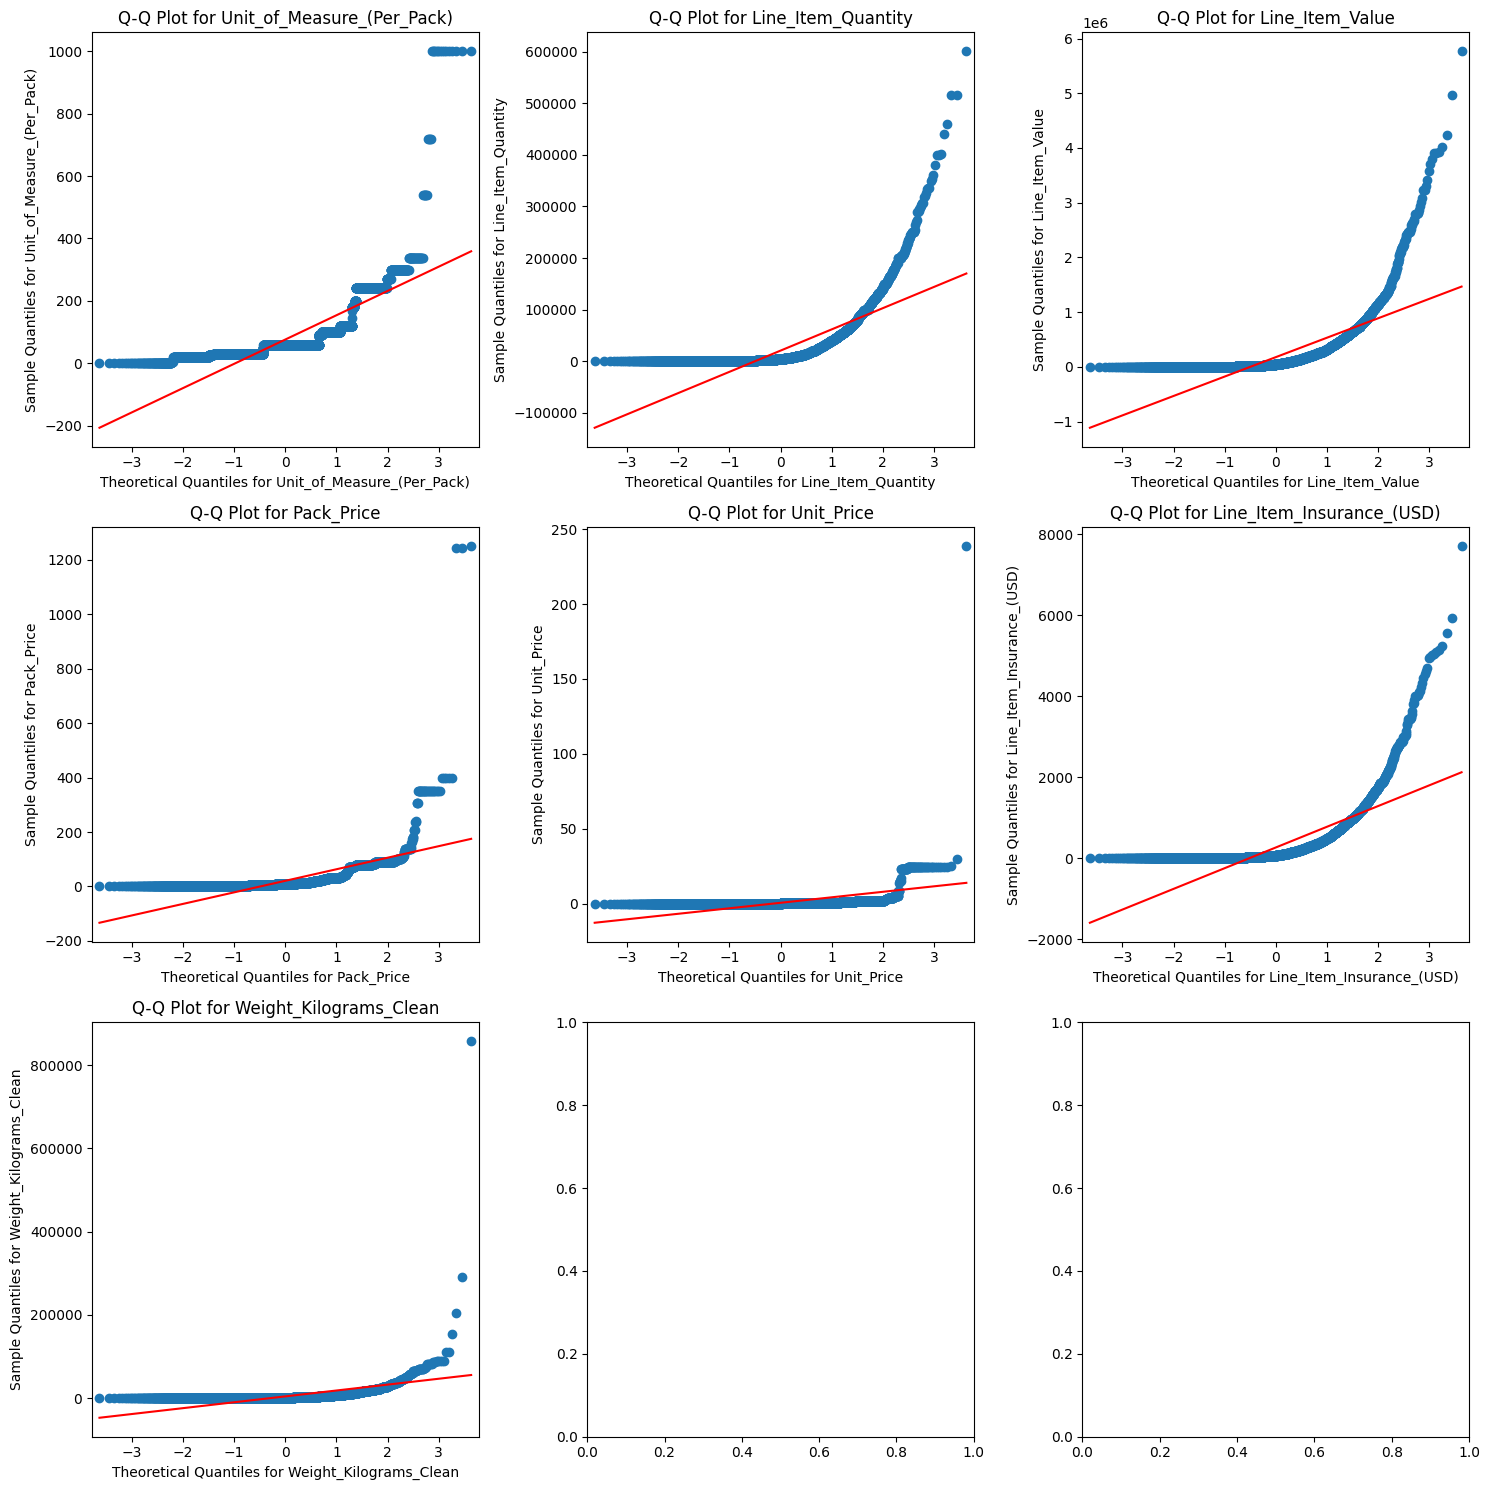

 Test Data 


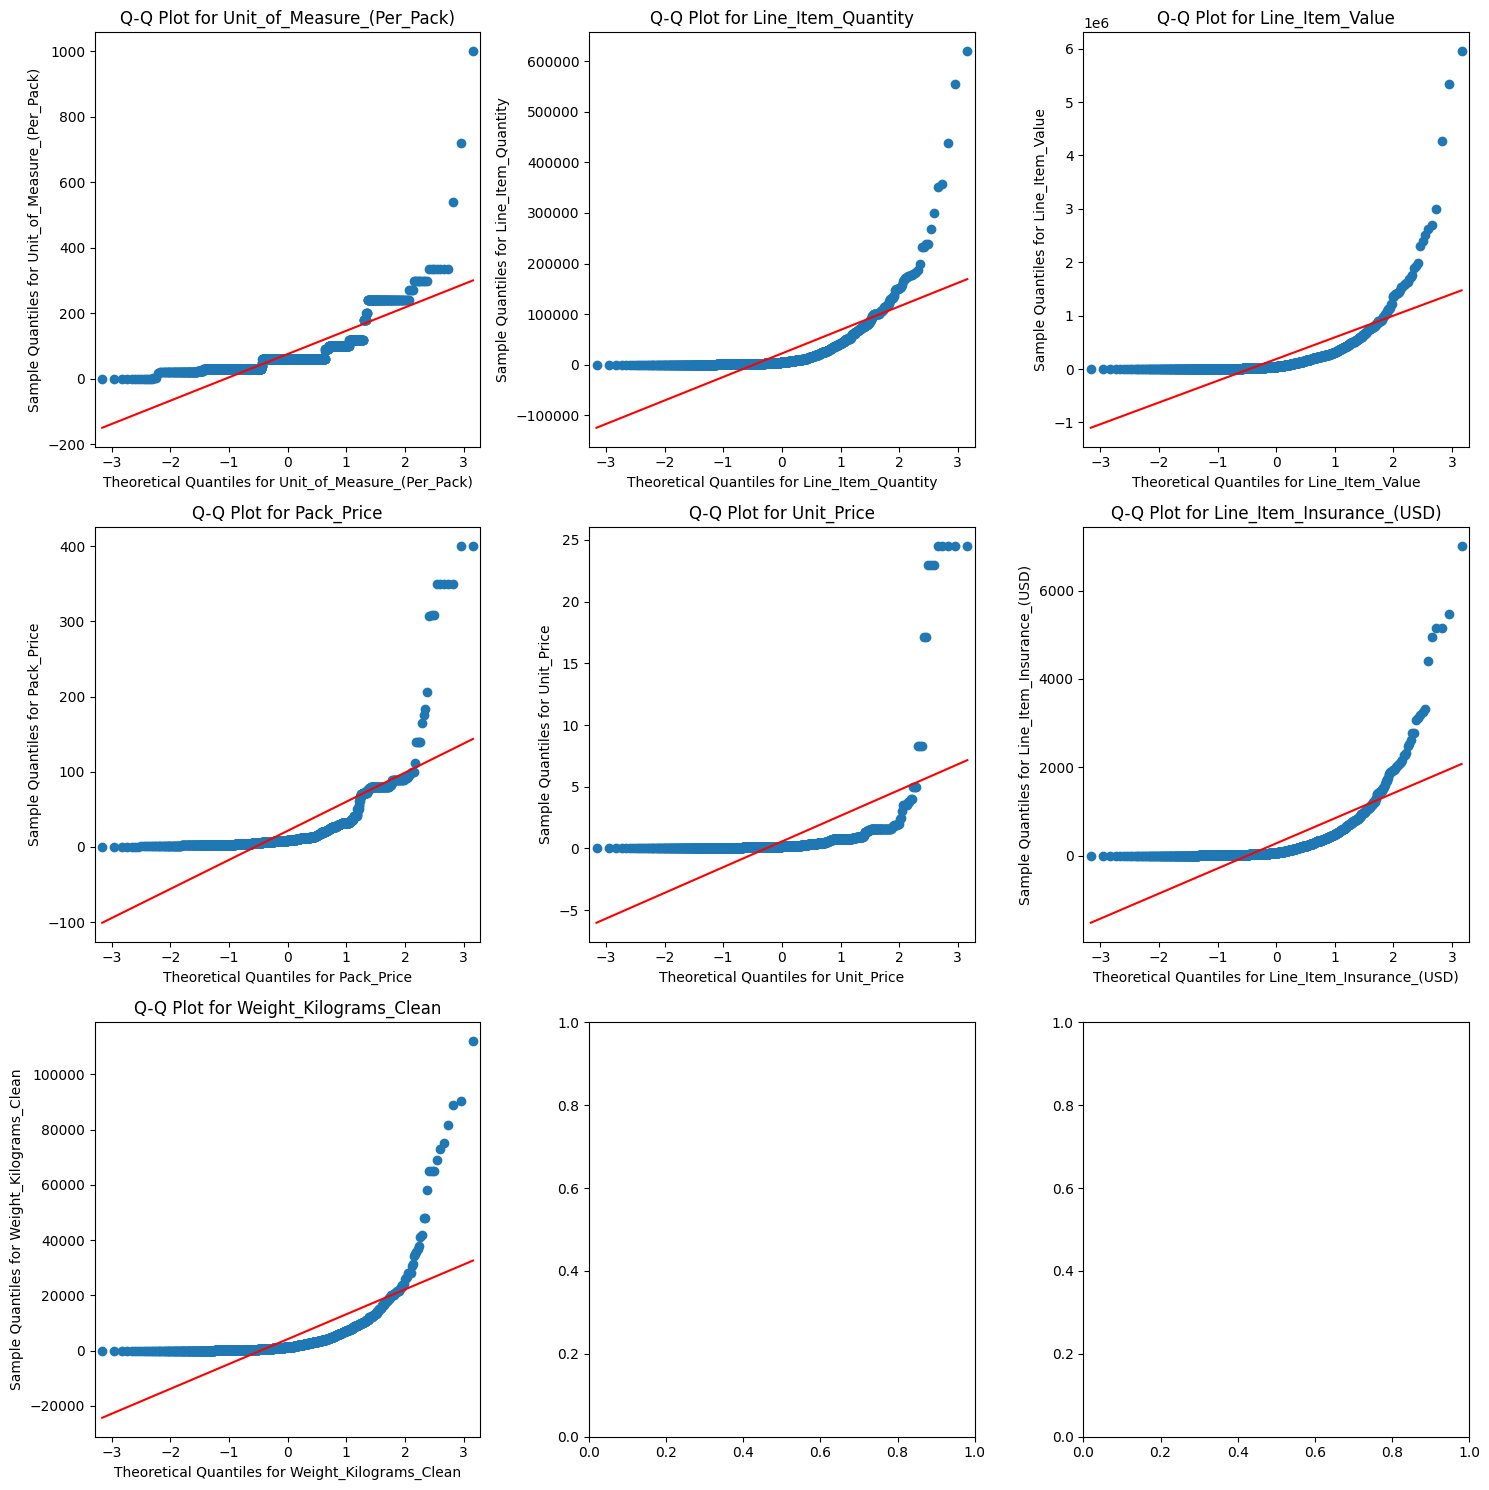

In [135]:
def plot_qq_plots(dataframe, column_labels, plots_per_row=3):
    # Check if the columns exist in the DataFrame
    for label in column_labels:
        if label not in dataframe.columns:
            raise ValueError(f"Column '{label}' not found in the DataFrame.")

    # Calculate the number of rows needed
    num_columns = len(column_labels)
    num_rows = (num_columns + plots_per_row - 1) // plots_per_row

    # Create Q-Q plots
    fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 5 * num_rows))

    for i, label in enumerate(column_labels):
        row_idx = i // plots_per_row
        col_idx = i % plots_per_row

        ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
        sm.qqplot(dataframe[label], line='s', ax=ax)
        ax.set_xlabel(f'Theoretical Quantiles for {label}')
        ax.set_ylabel(f'Sample Quantiles for {label}')
        ax.set_title(f'Q-Q Plot for {label}')

    # Adjust layout to prevent clipping of titles
    plt.tight_layout()
    plt.show()

print(" Train Data ")

plot_qq_plots(dataframe=X_train, column_labels=numerical_columns)

print(" Test Data ")

plot_qq_plots(dataframe=X_test, column_labels=numerical_columns)

In [136]:
def log_transform(df, column_list):
    """
    Apply log transformation to specified columns in a DataFrame.

    Parameters:
    - df: pandas DataFrame
    - column_list: list of column names to be transformed

    Returns:
    - transformed_df: pandas DataFrame with log-transformed columns
    """
    transformed_df = df.copy()

    for column in column_list:
        # Adding 1 to handle zero values
        transformed_data = np.log1p(df[column])
        transformed_df[column] = transformed_data

        # Plot the original and transformed data
        plt.figure(figsize=(12, 6))

        # Original data histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[column], kde=True)
        plt.title(f'Original {column}')

        # Transformed data histogram
        plt.subplot(1, 2, 2)
        sns.histplot(transformed_data, kde=True)
        plt.title(f'Log Transformed {column}')

        plt.show()

    return transformed_df

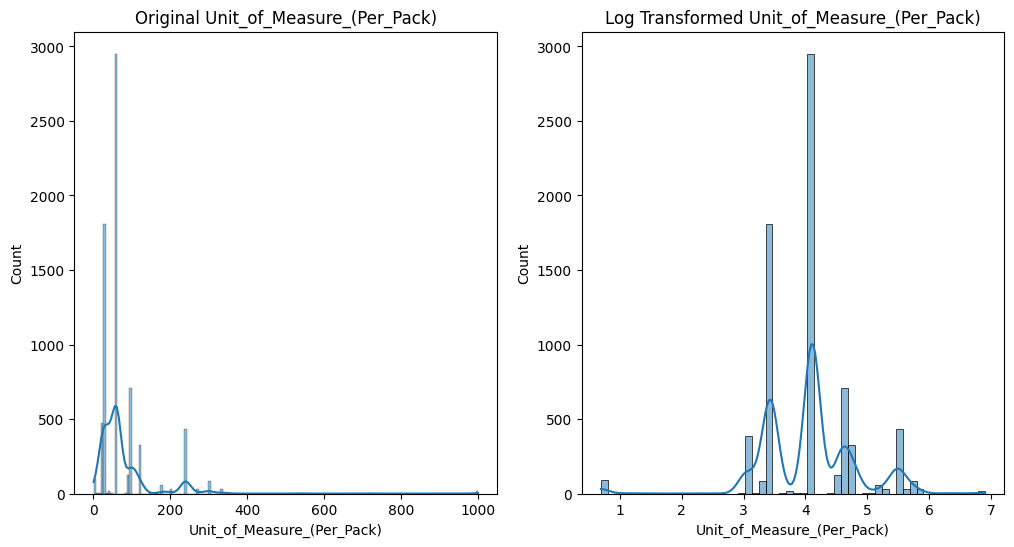

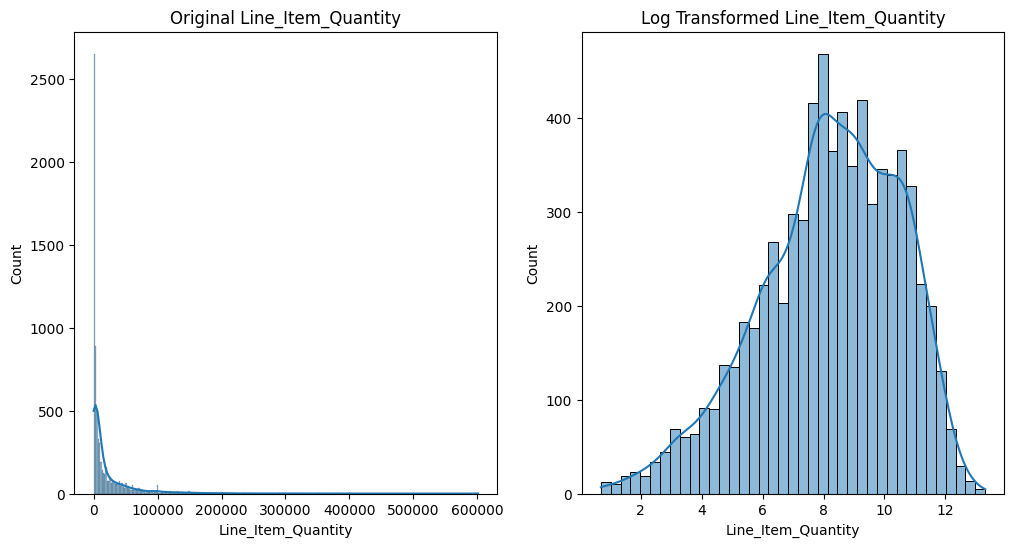

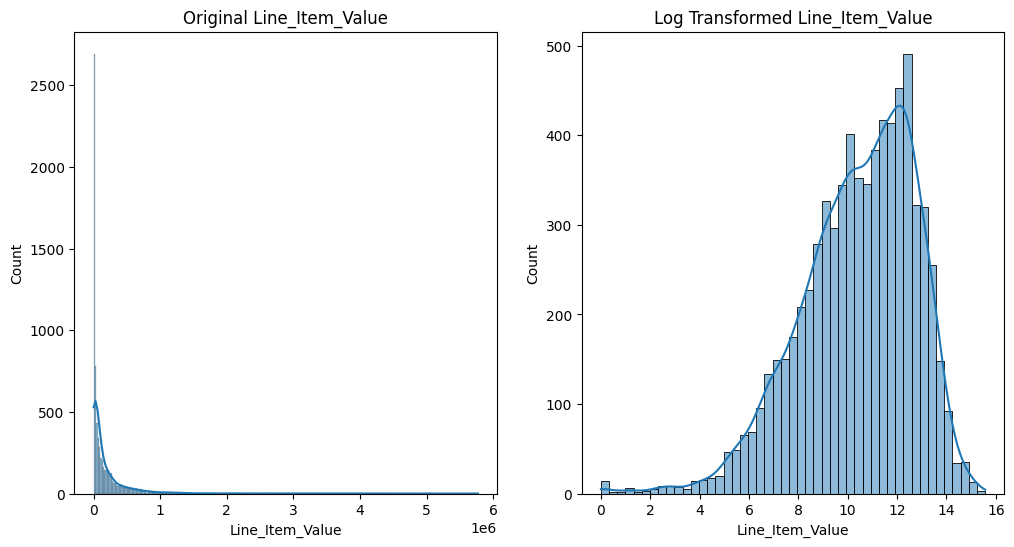

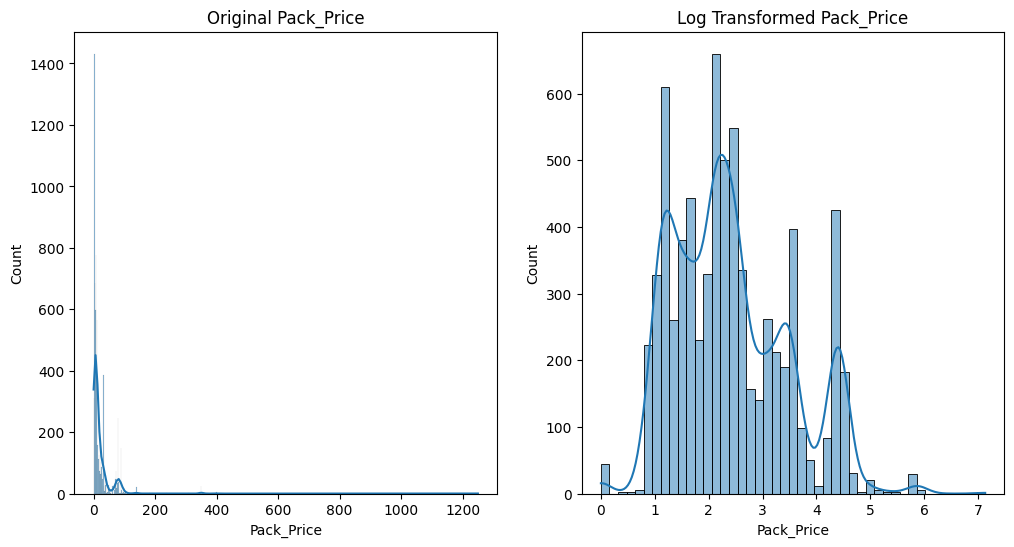

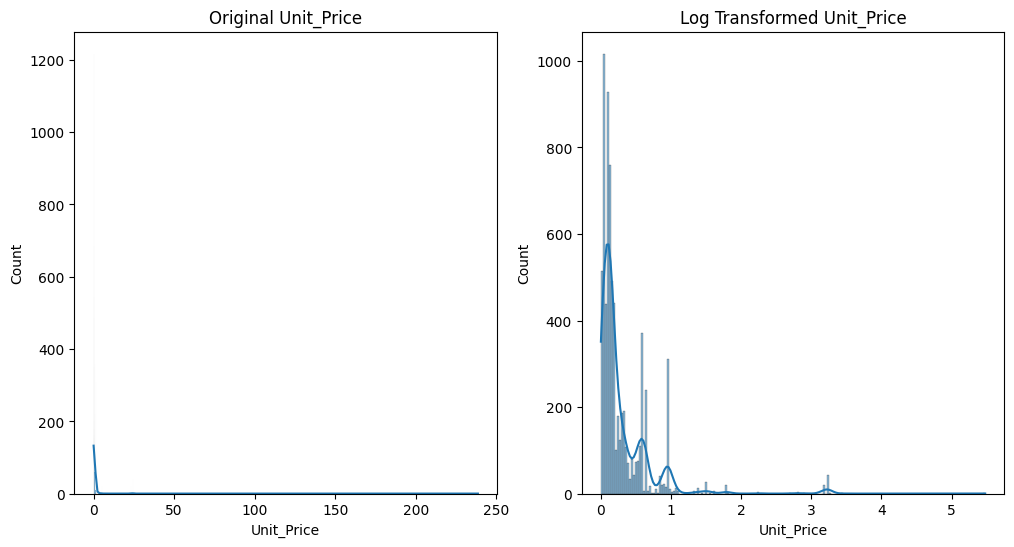

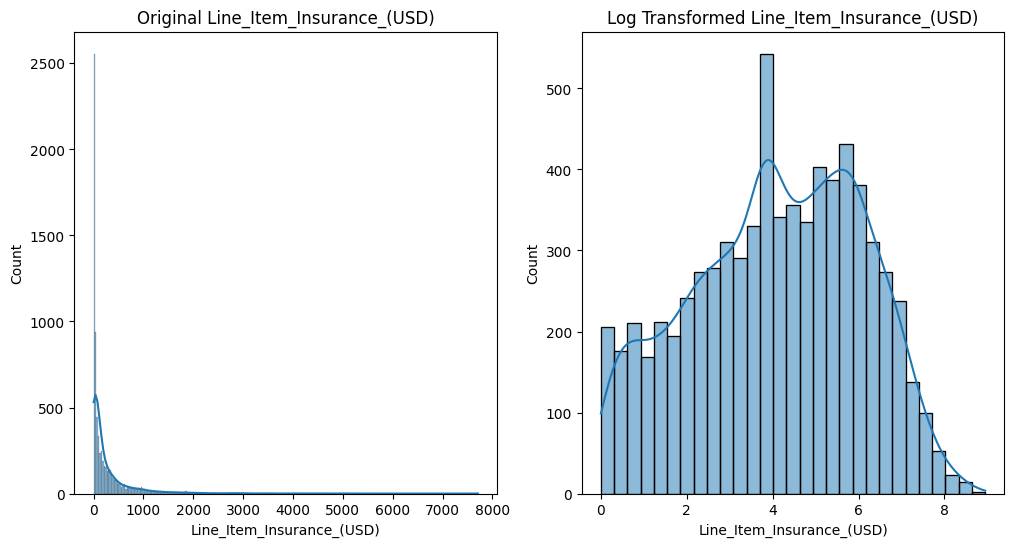

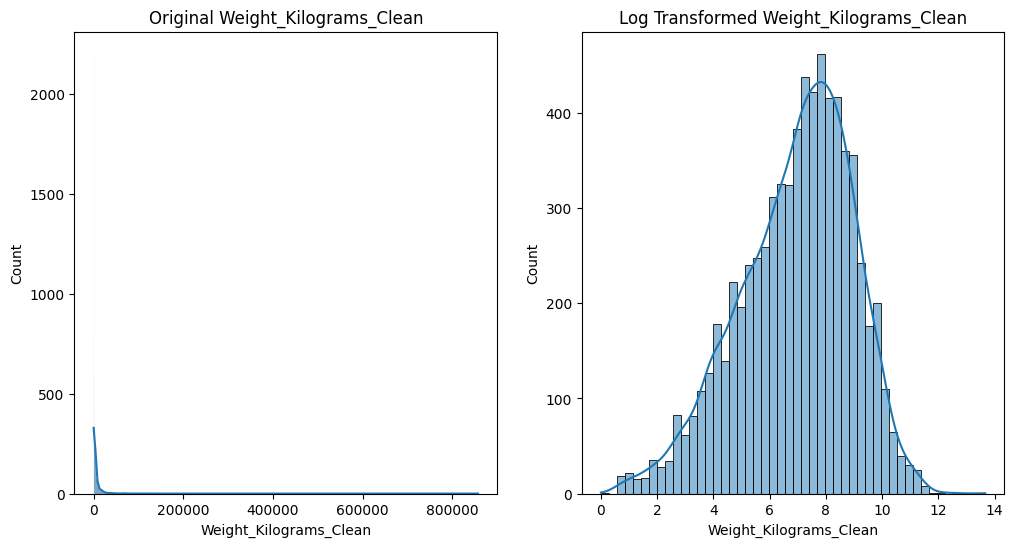

In [137]:
X_train_transformed =log_transform(X_train, column_list=numerical_columns)

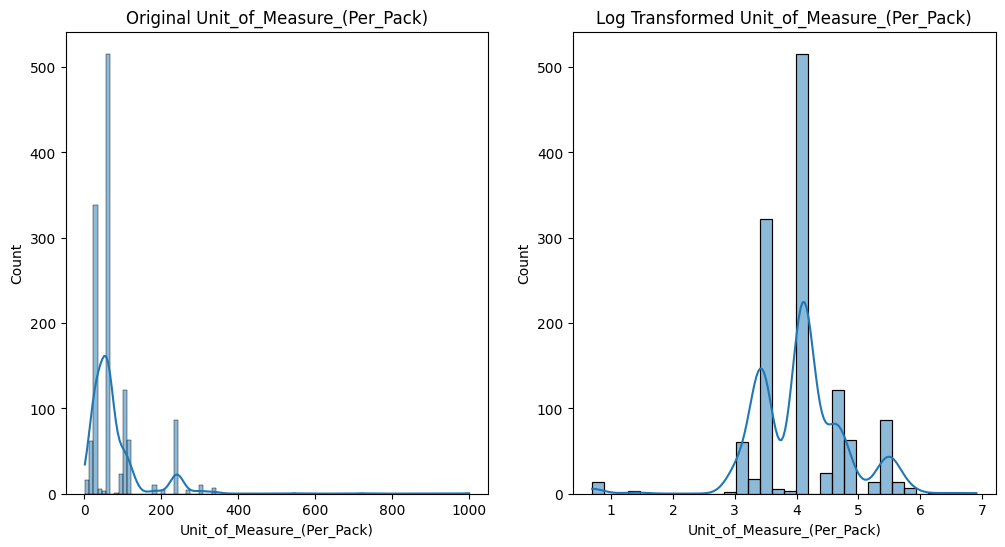

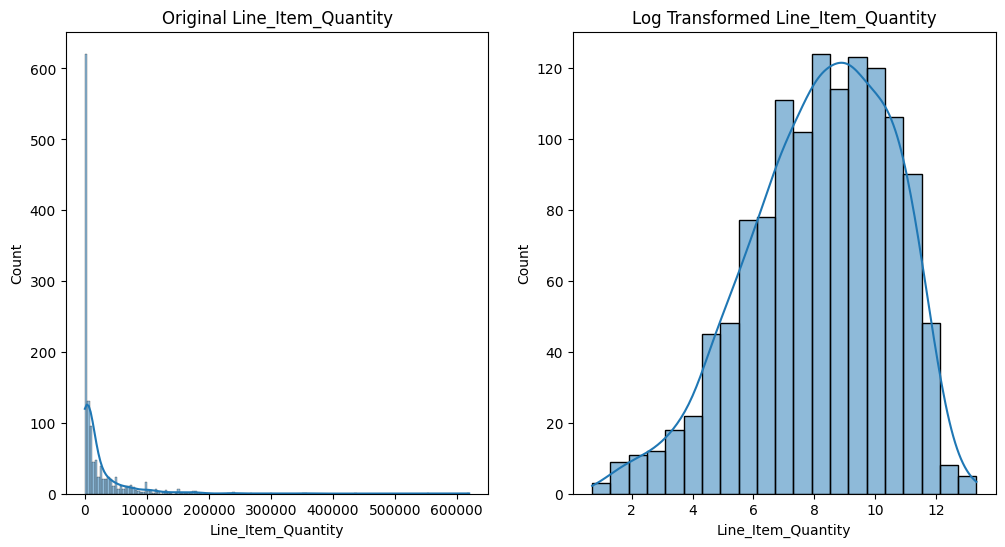

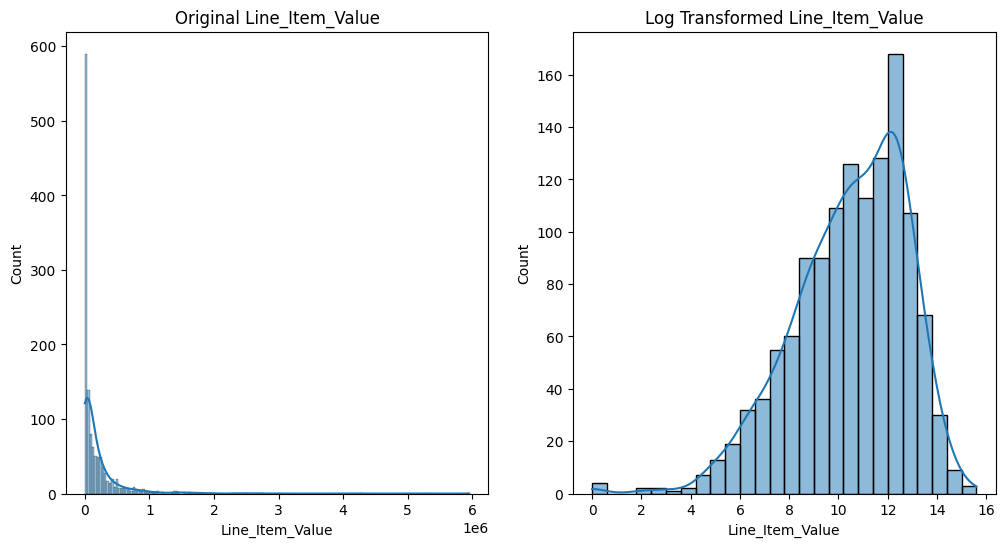

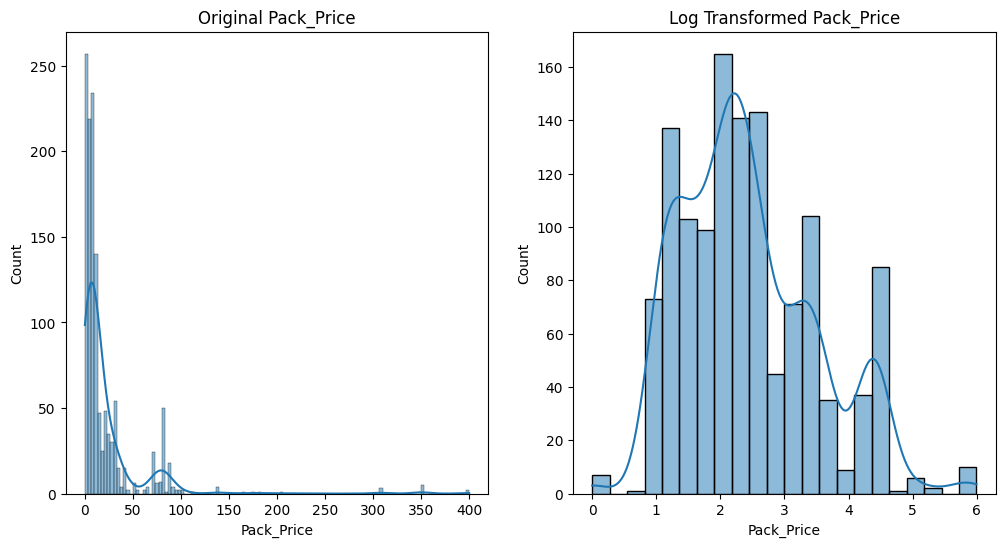

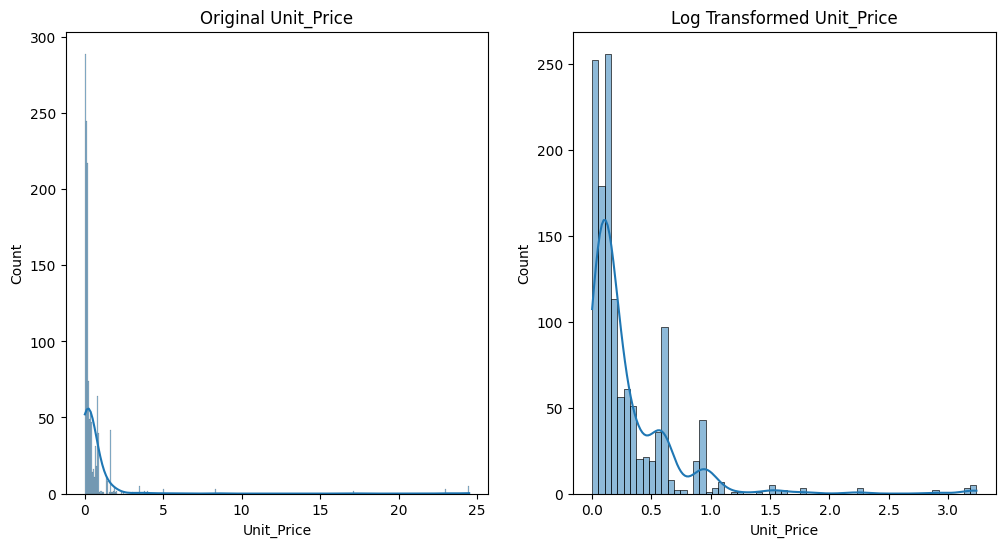

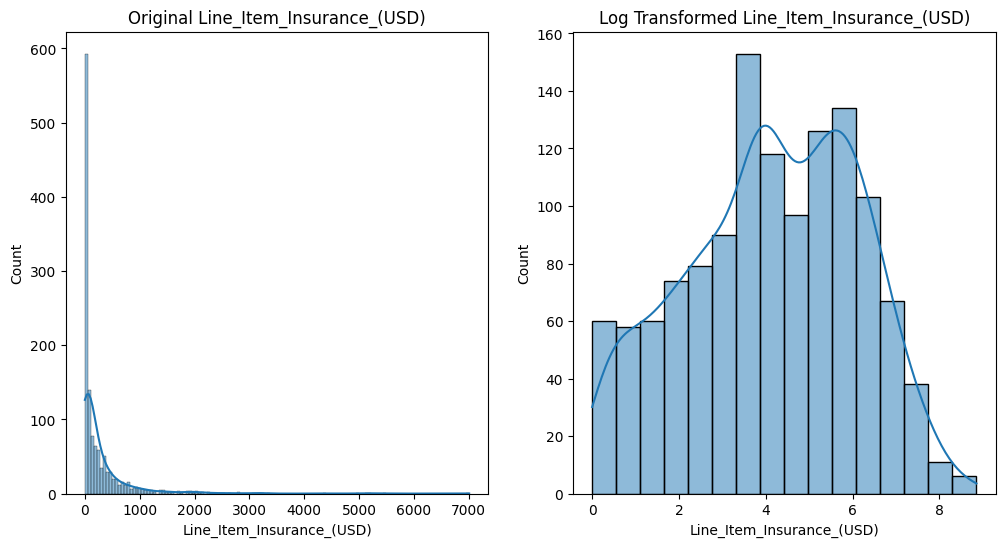

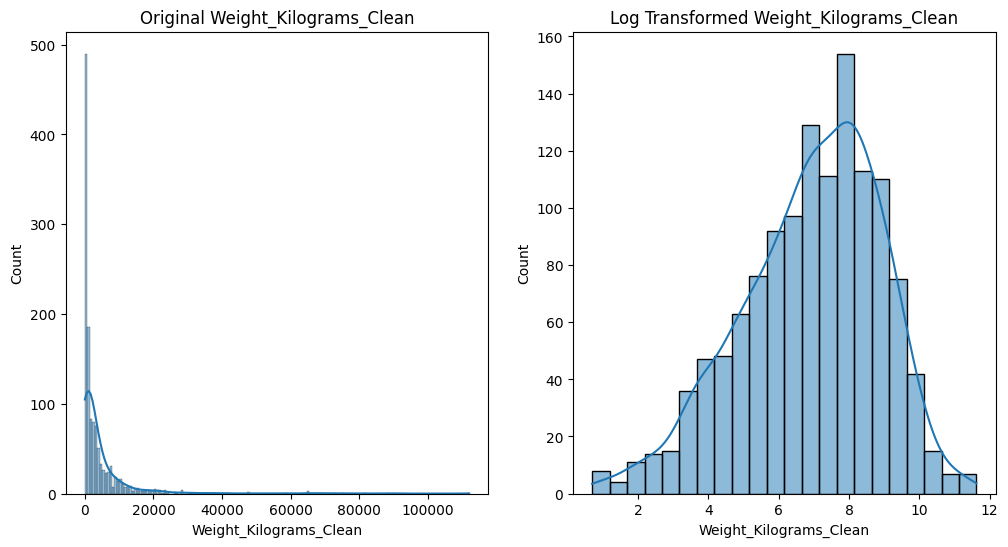

In [138]:
X_test_transformed =log_transform(X_test, column_list=numerical_columns)

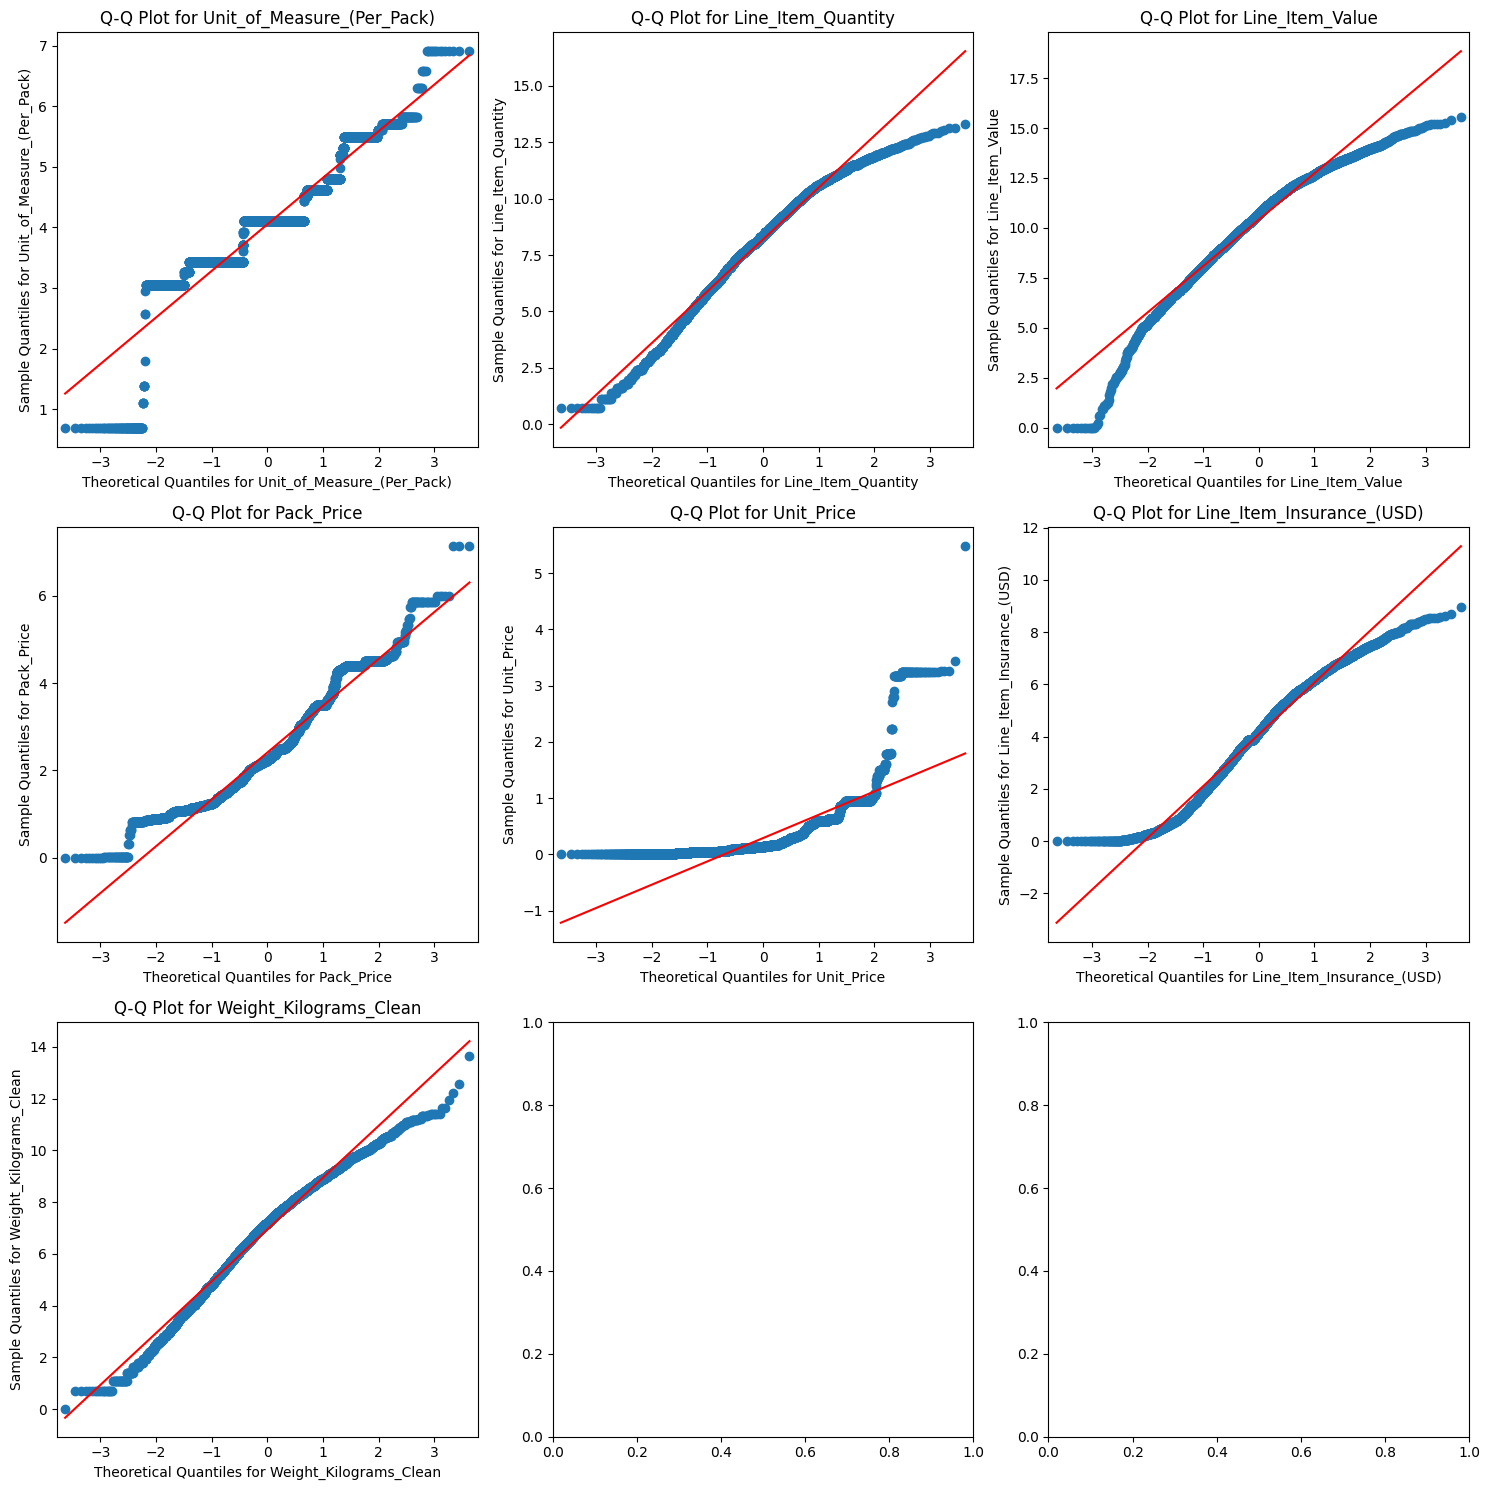

In [139]:
plot_qq_plots(dataframe=X_train_transformed, column_labels=numerical_columns)

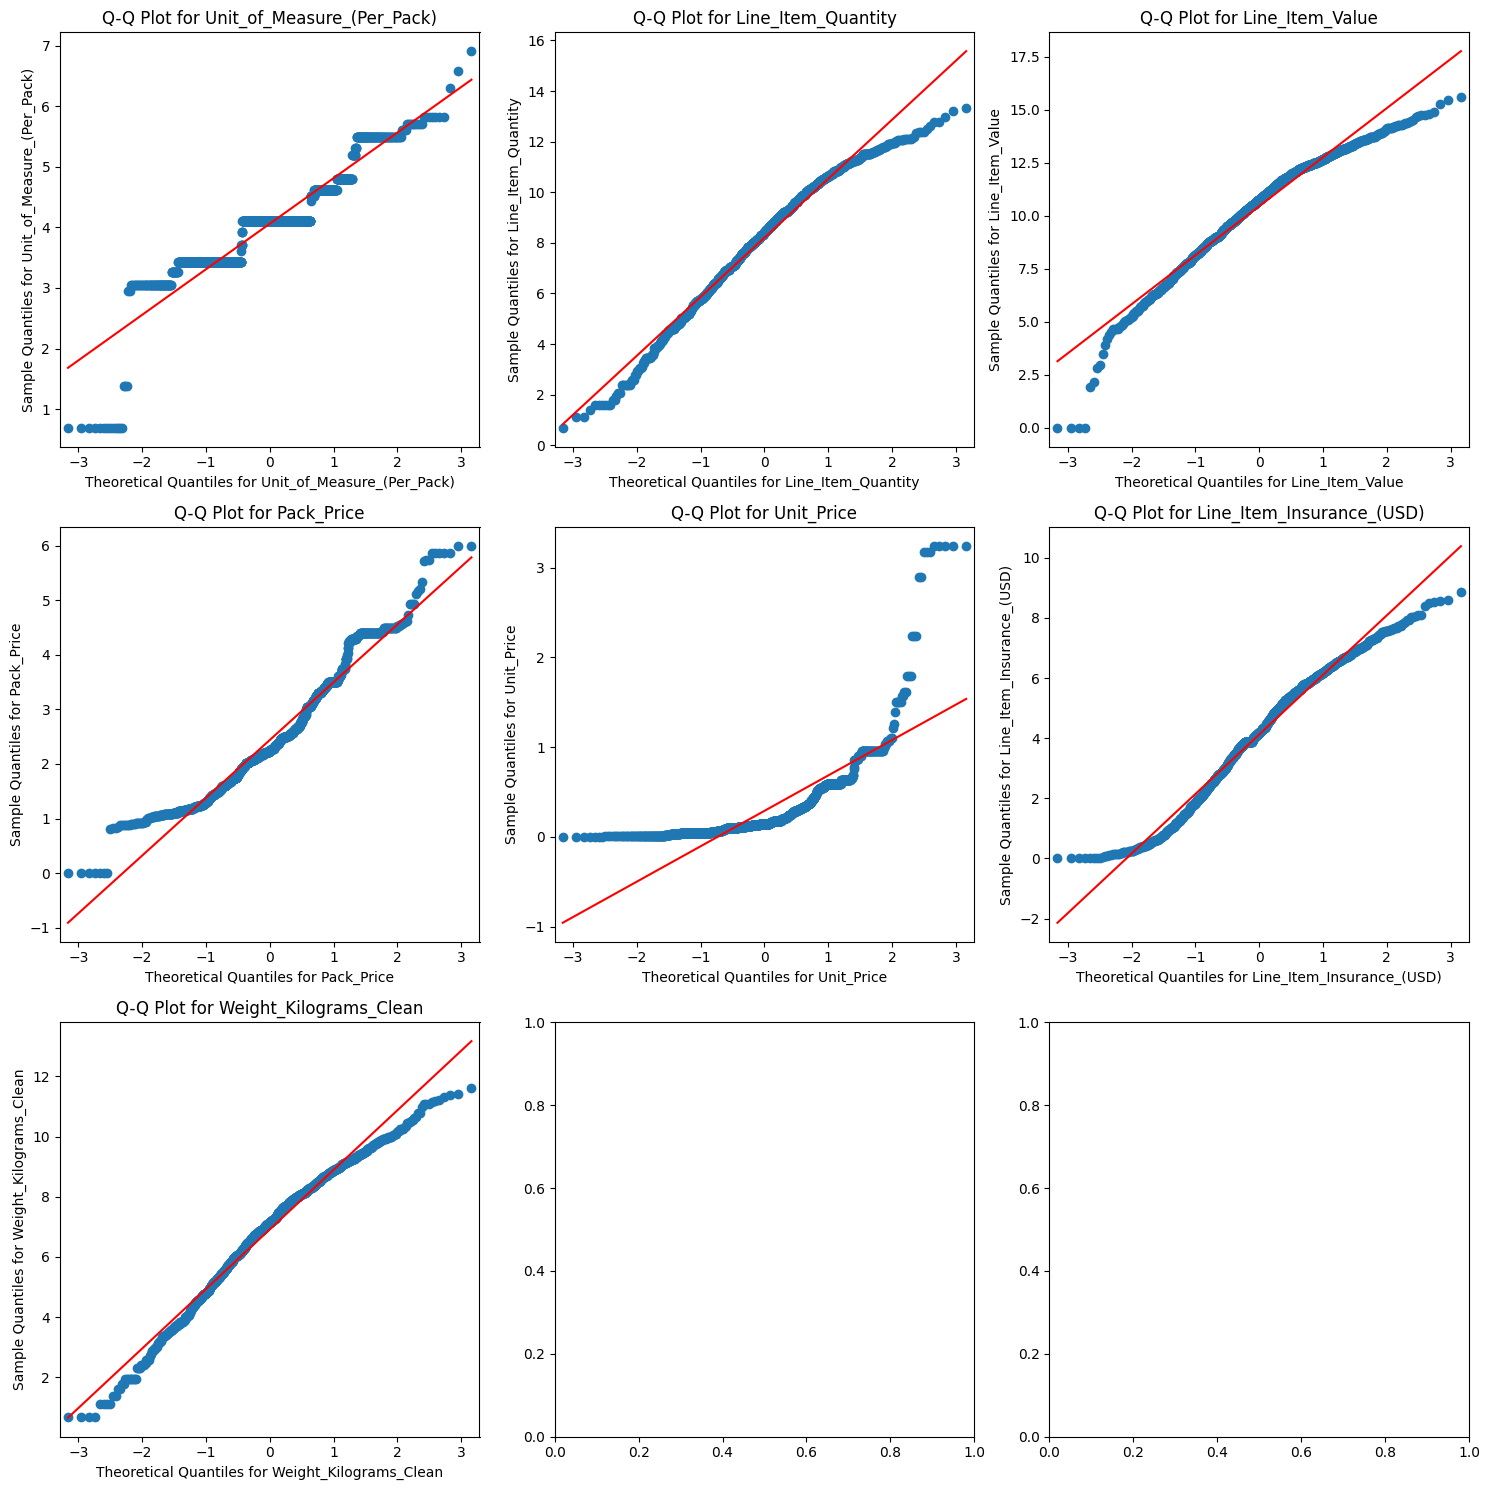

In [140]:
plot_qq_plots(dataframe=X_test_transformed, column_labels=numerical_columns)

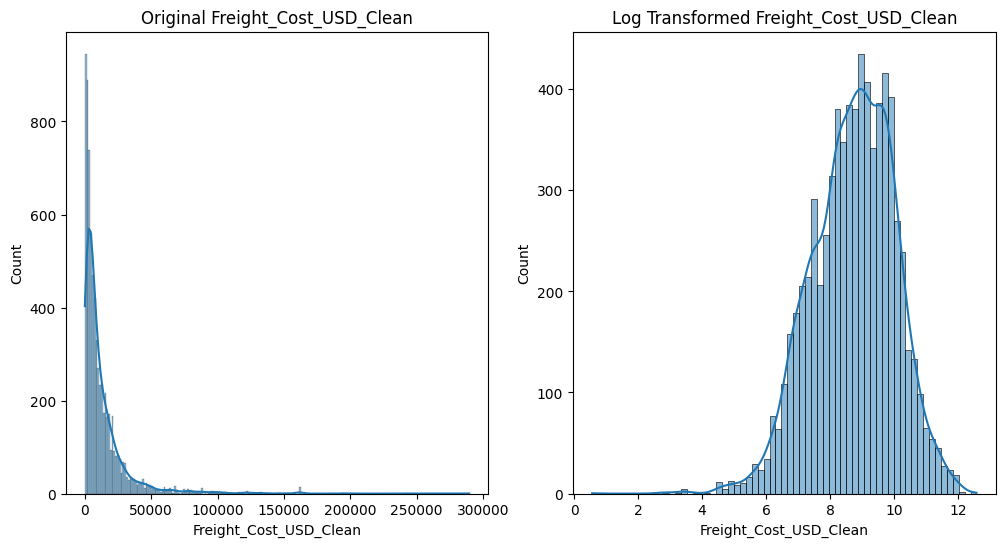

In [141]:
y_train_transformed =log_transform(y_train, column_list=[target_column])

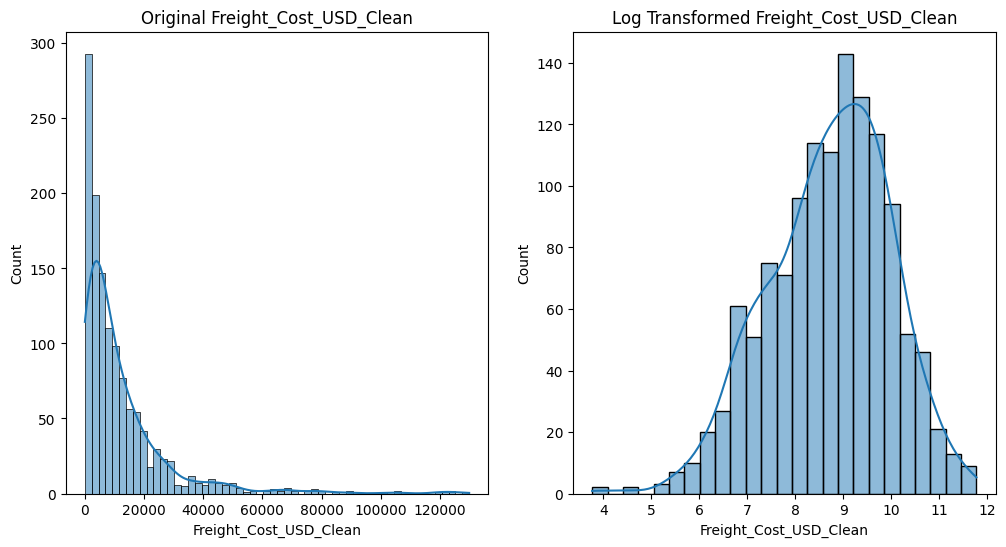

In [142]:
y_test_transformed =log_transform(y_test, column_list=[target_column])

In [143]:
y_train_transformed = np.ravel(y_train_transformed)
y_test_transformed = np.ravel(y_test_transformed)

## Model Training

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import  SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [ ]:
results = pd.DataFrame({'Score':['Mean Absolute Error', 'Root Mean Squared Error', 'Mean Squared Error', 'R Square']})

In [ ]:
regression_models = {
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XG Boost": xgb.XGBRegressor(eval_metric='rmsle'),
    "Support Vector Regression": SVR(),
    "Bagging": BaggingRegressor()
}

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
class RegressionModelEvaluator:
    def __init__(self, models, X_train, X_test, y_train, y_test):
        self.models = models
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.results = pd.DataFrame({'Score': ['Mean Absolute Error', 'Root Mean Squared Error', 'Mean Squared Error', 'R Square']})
        self.results_with_models = {}  # Dictionary to store models along with scores

    def train_and_evaluate(self):
        for model_name, model in self.models.items():
            model.fit(self.X_train, self.y_train)
            predictions = model.predict(self.X_test)

            mae = round(mean_absolute_error(self.y_test, predictions), 2)
            rmse = round(mean_squared_error(self.y_test, predictions, squared=False), 2)
            mse = round(mean_squared_error(self.y_test, predictions), 2)
            r2 = round(r2_score(self.y_test, predictions), 2)

            scores = [mae, rmse, mse, r2]
            self.results[model_name] = scores

            # Save the model with its scores
            self.results_with_models[model_name] = {'model': model, 'scores': scores}

    def get_results(self):
        return self.results

    def get_results_with_models(self):
        return self.results_with_models

evaluator = RegressionModelEvaluator(models=regression_models, X_train=X_train_transformed, X_test=X_test_transformed, y_train=y_train_transformed, y_test=y_test_transformed)
evaluator.train_and_evaluate()
results_df = evaluator.get_results()
print(results_df)

g:\Resume_Projects\Regression\Shipment_MLOPS\.venv\Lib\site-packages\scikit_learn-1.4.0rc1-py3.11-win-amd64.egg\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
g:\Resume_Projects\Regression\Shipment_MLOPS\.venv\Lib\site-packages\scikit_learn-1.4.0rc1-py3.11-win-amd64.egg\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
g:\Resume_Projects\Regression\Shipment_MLOPS\.venv\Lib\site-packages\scikit_learn-1.4.0rc1-py3.11-win-amd64.egg\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


g:\Resume_Projects\Regression\Shipment_MLOPS\.venv\Lib\site-packages\scikit_learn-1.4.0rc1-py3.11-win-amd64.egg\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
g:\Resume_Projects\Regression\Shipment_MLOPS\.venv\Lib\site-packages\scikit_learn-1.4.0rc1-py3.11-win-amd64.egg\sklearn\base.py:1194: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
g:\Resume_Projects\Regression\Shipment_MLOPS\.venv\Lib\site-packages\scikit_learn-1.4.0rc1-py3.11-win-amd64.egg\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

                     Score  Linear Regression  Ridge Regression  \
0      Mean Absolute Error               0.55              0.55   
1  Root Mean Squared Error               0.73              0.72   
2       Mean Squared Error               0.53              0.52   
3                 R Square               0.67              0.67   

   Lasso Regression  Decision Tree  Random Forest  Gradient Boosting  \
0              0.78           0.50           0.39               0.47   
1              0.97           0.81           0.58               0.63   
2              0.94           0.65           0.33               0.40   
3              0.41           0.59           0.79               0.75   

   XG Boost  K-Nearest Neighbors  Support Vector Regression  AdaBoost  Bagging  
0      0.43                 0.48                       0.51      0.73     0.41  
1      0.61                 0.67                       0.69      0.92     0.60  
2      0.37                 0.45                       0.48 

g:\Resume_Projects\Regression\Shipment_MLOPS\.venv\Lib\site-packages\scikit_learn-1.4.0rc1-py3.11-win-amd64.egg\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
results_df

,Score,Linear Regression,Ridge Regression,Lasso Regression,Decision Tree,Random Forest,Gradient Boosting,XG Boost,K-Nearest Neighbors,Support Vector Regression,AdaBoost,Bagging
0,Mean Absolute Error,0.55,0.55,0.78,0.50,0.39,0.47,0.43,0.48,0.51,0.73,0.41
1,Root Mean Squared Error,0.73,0.72,0.97,0.81,0.58,0.63,0.61,0.67,0.69,0.92,0.60
2,Mean Squared Error,0.53,0.52,0.94,0.65,0.33,0.40,0.37,0.45,0.48,0.85,0.36
3,R Square,0.67,0.67,0.41,0.59,0.79,0.75,0.77,0.72,0.70,0.47,0.77


##### Choosing the Best Models

In [ ]:
regression_models = {
    "Random Forest": RandomForestRegressor(),
}

In [ ]:
evaluator = RegressionModelEvaluator(models=regression_models, X_train=X_train_transformed, X_test=X_test_transformed, y_train=y_train_transformed, y_test=y_test_transformed)
evaluator.train_and_evaluate()
results_df = evaluator.get_results()
print(results_df)

g:\Resume_Projects\Regression\Shipment_MLOPS\.venv\Lib\site-packages\scikit_learn-1.4.0rc1-py3.11-win-amd64.egg\sklearn\base.py:1194: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


                     Score  Random Forest
0      Mean Absolute Error           0.39
1  Root Mean Squared Error           0.58
2       Mean Squared Error           0.33
3                 R Square           0.79


g:\Resume_Projects\Regression\Shipment_MLOPS\.venv\Lib\site-packages\scikit_learn-1.4.0rc1-py3.11-win-amd64.egg\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
model=evaluator.get_results_with_models()
rf_model=model['Random Forest']['model']

params=rf_model.get_params()
params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [37]:
def plot_feature_importance(model, top_n=15):
    """
    Plot feature importance for a given model.

    Parameters:
    - model: The trained machine learning model (must have 'feature_importances_' attribute).
    - top_n: Number of top features to display in the plot.

    Returns:
    None
    """
    # Check if the model has feature_importances_ attribute
    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
        feature_names = X_train.columns  # Assuming X_train is your training data

        # Sort feature importances in descending order
        indices = feature_importance.argsort()[::-1][:top_n]  # Select top N features

        # Plot the feature importances
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(indices)), feature_importance[indices], align='center')
        plt.xticks(range(len(indices)), feature_names[indices], rotation=90)
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.title(f'Top {top_n} Feature Importance')
        plt.show()
    else:
        print("The provided model does not have feature importances.")


### Hyper paramter Tunning

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, r2_score
import optuna

def objective(trial):
    # Define the hyperparameter space for Optuna
    param_dist = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_categorical('max_depth', [None, 10, 20, 30, 40, 50]),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
    }

    # Create the RandomForestRegressor model
    rf_model = RandomForestRegressor(**param_dist, random_state=42)

    # Fit the model and calculate R2 score
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    return r2

def optimize_random_forest(X_train, X_test, y_train, y_test, n_trials=2):
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=n_trials)

    # Get the best hyperparameters
    best_params = study.best_params
    print("Best Hyperparameters:", best_params)

    # Create the RandomForestRegressor model with the best hyperparameters
    best_rf_model = RandomForestRegressor(**best_params, random_state=42)

    # Fit the best model to the data
    best_rf_model.fit(X_train, y_train)

    # Make predictions on the test set using the best model
    y_pred = best_rf_model.predict(X_test)

    # Evaluate the model using R2 score
    r2 = r2_score(y_test, y_pred)
    result_data = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

    print("R2 Score on Test Set:", r2)

    return best_params, r2, result_data,best_rf_model





g:\Resume_Projects\Regression\Shipment_MLOPS\.venv\Lib\site-packages\tqdm-4.66.1-py3.11.egg\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [40]:
best_params, r2, result_data,best_rf_model=optimize_random_forest(X_train=X_train_transformed, X_test=X_test_transformed, y_train=y_train_transformed, y_test=y_test_transformed, n_trials=2)

[I 2024-01-05 13:50:56,985] A new study created in memory with name: no-name-58367d5a-31a6-4c4e-b4ed-b4972b5173a4
g:\Resume_Projects\Regression\Shipment_MLOPS\.venv\Lib\site-packages\scikit_learn-1.4.0rc1-py3.11-win-amd64.egg\sklearn\base.py:1194: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[I 2024-01-05 13:51:03,766] Trial 0 finished with value: 0.7267851836077993 and parameters: {'n_estimators': 89, 'max_depth': None, 'min_samples_split': 10, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.7267851836077993.
g:\Resume_Projects\Regression\Shipment_MLOPS\.venv\Lib\site-packages\scikit_learn-1.4.0rc1-py3.11-win-amd64.egg\sklearn\base.py:1194: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, 

Best Hyperparameters: {'n_estimators': 89, 'max_depth': None, 'min_samples_split': 10, 'min_samples_leaf': 8}
R2 Score on Test Set: 0.7663500584235579


In [41]:
best_params

{'n_estimators': 89,
 'max_depth': None,
 'min_samples_split': 10,
 'min_samples_leaf': 8}

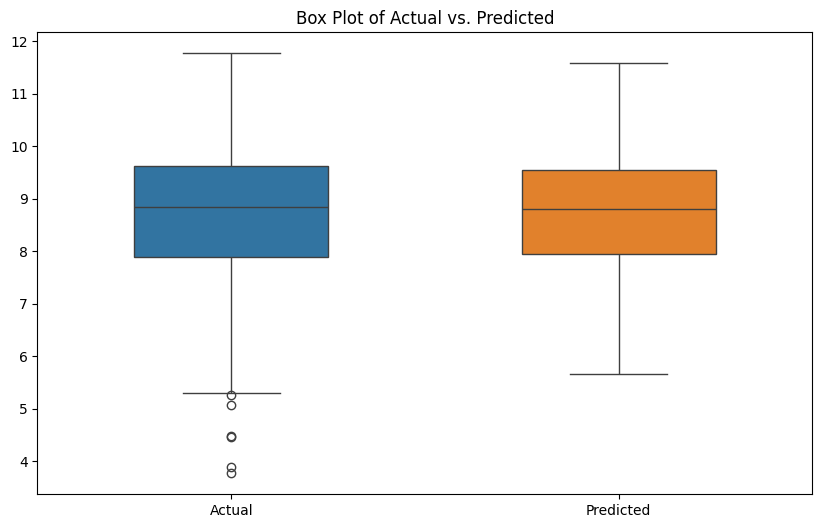

In [42]:
# Create a new DataFrame with 'y_test' and 'y_pred'
data_to_plot = pd.DataFrame({'Actual': result_data['y_test'], 'Predicted': result_data['y_pred']})

# Use Seaborn to create side-by-side box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot, width=0.5)
plt.title('Box Plot of Actual vs. Predicted')
plt.show()

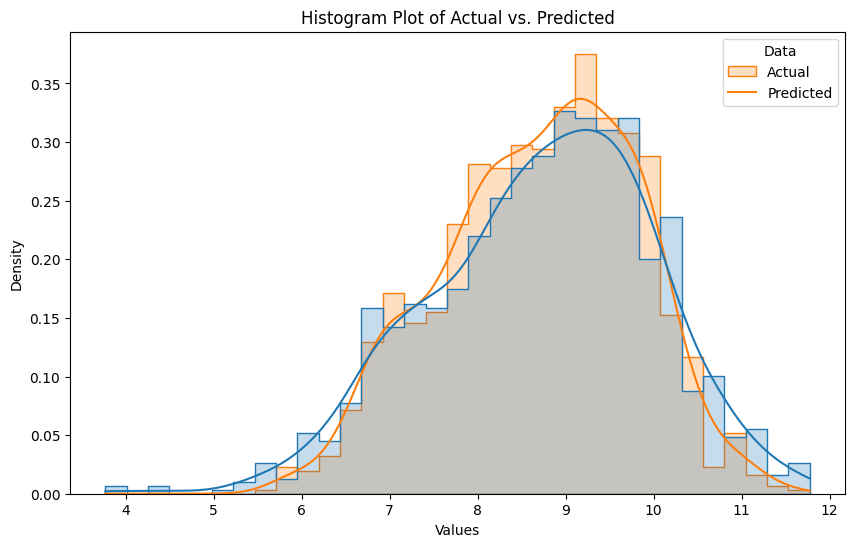

In [43]:
# Create a new DataFrame with 'y_test' and 'y_pred'
data_to_plot = pd.DataFrame({'Actual': result_data['y_test'], 'Predicted': result_data['y_pred']})

# Use Seaborn to create side-by-side histogram plots
plt.figure(figsize=(10, 6))
sns.histplot(data=data_to_plot, kde=True, element="step", stat="density", common_norm=False)
plt.title('Histogram Plot of Actual vs. Predicted')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend(title='Data', labels=['Actual', 'Predicted'])
plt.show()

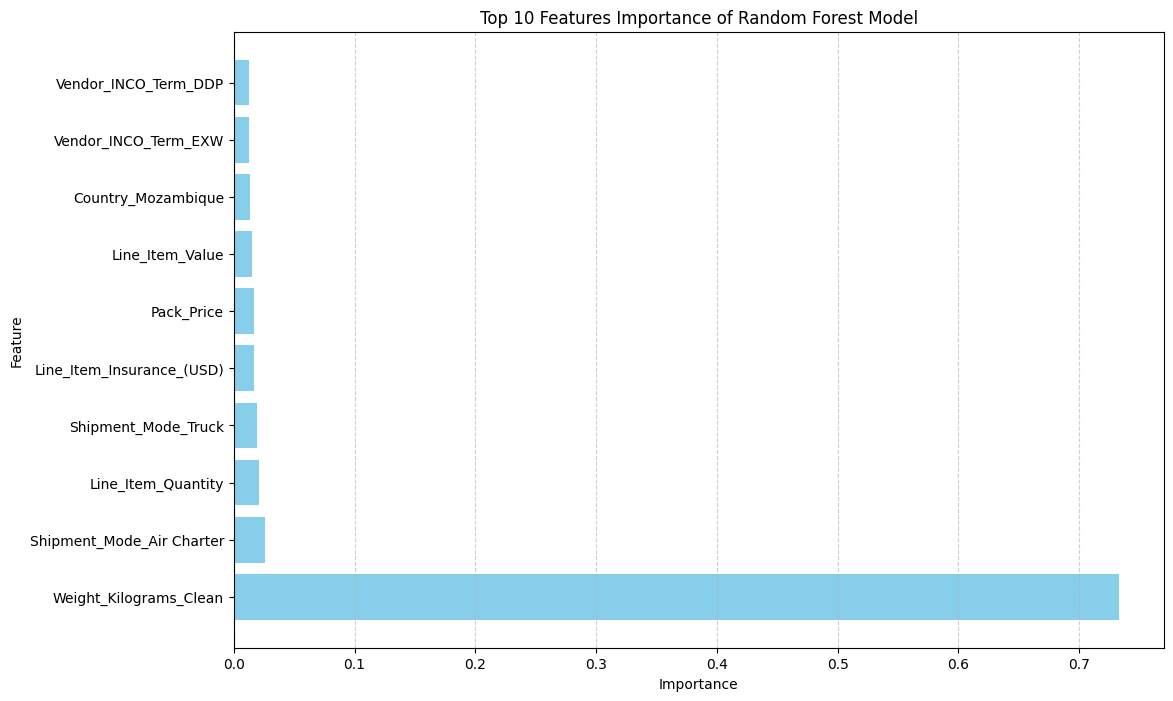

In [44]:
def plot_feature_importance(rf_model=best_rf_model, feature_names=X_train.columns, top_n=10):
    """
    Plot feature importance for a Random Forest model.

    Parameters:
    - rf_model: Trained Random Forest model (default is None, provide your model)
    - feature_names: Names of the features in the same order as they appear in the model (default is None, provide your feature names)
    - top_n: Number of top features to plot (default is 10)

    Returns:
    - None
    """
    if rf_model is None or feature_names is None:
        raise ValueError("Please provide a trained Random Forest model and feature names.")

    # Get feature importance
    feature_importance = rf_model.feature_importances_

    # Sort features by importance
    sorted_idx = np.argsort(feature_importance)[::-1]
    sorted_feature_names = feature_names[sorted_idx]
    sorted_feature_importance = feature_importance[sorted_idx]

    # Select top features if top_n is specified
    if top_n is not None:
        sorted_feature_names = sorted_feature_names[:top_n]
        sorted_feature_importance = sorted_feature_importance[:top_n]

    # Plot feature importance
    plt.figure(figsize=(12, 8))
    plt.barh(range(len(sorted_feature_importance)), sorted_feature_importance, align="center", color='skyblue')
    plt.yticks(range(len(sorted_feature_importance)), sorted_feature_names)
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title("Top {} Features Importance of Random Forest Model".format(top_n))
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()
    
plot_feature_importance()

## Ensemble Techniques

In [144]:
regression_models = {
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": xgb.XGBRegressor()
}

In [149]:
import optuna
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import r2_score
import pandas as pd

def objective(trial, model_name):
    if model_name == 'Random Forest':
        return objective_random_forest(trial)
    elif model_name == 'Gradient Boosting':
        return objective_gradient_boosting(trial)
    elif model_name == 'XGBoost':
        return objective_xgboost(trial)

def objective_random_forest(trial):
    param_dist = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_categorical('max_depth', [None, 10, 20, 30, 40, 50]),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
    }
    model = RandomForestRegressor(**param_dist, random_state=42)
    return optimize_and_evaluate_model(model)

def objective_gradient_boosting(trial):
    param_dist = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_categorical('max_depth', [3, 5, 7, 10]),
    }
    model = GradientBoostingRegressor(**param_dist, random_state=42)
    return optimize_and_evaluate_model(model)

def objective_xgboost(trial):
    param_dist = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_categorical('max_depth', [3, 5, 7, 10]),
    }
    model = xgb.XGBRegressor(**param_dist, random_state=42)
    return optimize_and_evaluate_model(model)

def optimize_and_evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    return r2

def optimize_model(X_train, X_test, y_train, y_test, model_name, n_trials=2):
    study = optuna.create_study(direction='maximize')
    objective_func = lambda trial: objective(trial, model_name)
    study.optimize(objective_func, n_trials=n_trials)

    best_params = study.best_params
    print(f"Best Hyperparameters for {model_name}:", best_params)

    model = get_model_instance(model_name, best_params)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    result_data = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

    print(f"R2 Score on Test Set for {model_name}:", r2)

    return best_params, r2, result_data, model

def get_model_instance(model_name, params):
    if model_name == 'Random Forest':
        return RandomForestRegressor(**params, random_state=42)
    elif model_name == 'Gradient Boosting':
        return GradientBoostingRegressor(**params, random_state=42)
    elif model_name == 'XGBoost':
        return xgb.XGBRegressor(**params, random_state=42)

best_params_rf, r2_rf, result_data_rf, best_rf_model = optimize_model(X_train_transformed, X_test_transformed, y_train_transformed, y_test_transformed, 'Random Forest', n_trials=5)
best_params_gb, r2_gb, result_data_gb, best_gb_model = optimize_model(X_train_transformed, X_test_transformed, y_train_transformed, y_test_transformed, 'Gradient Boosting', n_trials=5)
best_params_xgb, r2_xgb, result_data_xgb, best_xgb_model = optimize_model(X_train_transformed, X_test_transformed, y_train_transformed, y_test_transformed, 'XGBoost', n_trials=5)


[I 2024-01-05 14:12:23,626] A new study created in memory with name: no-name-3d6cd86b-d363-4b75-9484-ce85aa50a1aa
g:\Resume_Projects\Regression\Shipment_MLOPS\.venv\Lib\site-packages\scikit_learn-1.4.0rc1-py3.11-win-amd64.egg\sklearn\base.py:1194: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[I 2024-01-05 14:12:31,018] Trial 0 finished with value: 0.7494865368642412 and parameters: {'n_estimators': 107, 'max_depth': 40, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.7494865368642412.
g:\Resume_Projects\Regression\Shipment_MLOPS\.venv\Lib\site-packages\scikit_learn-1.4.0rc1-py3.11-win-amd64.egg\sklearn\base.py:1194: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *a

Best Hyperparameters for Random Forest: {'n_estimators': 107, 'max_depth': 40, 'min_samples_split': 6, 'min_samples_leaf': 4}


[I 2024-01-05 14:13:33,088] A new study created in memory with name: no-name-84f5e2c5-6dcc-4341-8e4e-7f13d82583a8


R2 Score on Test Set for Random Forest: 0.7758232301549325


g:\Resume_Projects\Regression\Shipment_MLOPS\.venv\Lib\site-packages\scikit_learn-1.4.0rc1-py3.11-win-amd64.egg\sklearn\ensemble\_gb.py:661: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
[I 2024-01-05 14:13:37,674] Trial 0 finished with value: 0.7228303276224879 and parameters: {'n_estimators': 125, 'learning_rate': 0.0978953478722772, 'max_depth': 5}. Best is trial 0 with value: 0.7228303276224879.
g:\Resume_Projects\Regression\Shipment_MLOPS\.venv\Lib\site-packages\scikit_learn-1.4.0rc1-py3.11-win-amd64.egg\sklearn\ensemble\_gb.py:661: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
[I 2024-01-05 14:13:41,609] Trial 1 finished with value: 0

Best Hyperparameters for Gradient Boosting: {'n_estimators': 119, 'learning_rate': 0.12259638962865495, 'max_depth': 10}


[I 2024-01-05 14:14:17,928] A new study created in memory with name: no-name-cd055e49-0af7-4c74-b121-a8c954385c27


R2 Score on Test Set for Gradient Boosting: 0.7815985679684412


[I 2024-01-05 14:14:18,482] Trial 0 finished with value: 0.7063754387691896 and parameters: {'n_estimators': 245, 'learning_rate': 0.01876763951145828, 'max_depth': 5}. Best is trial 0 with value: 0.7063754387691896.
[I 2024-01-05 14:14:19,416] Trial 1 finished with value: 0.7399932841691972 and parameters: {'n_estimators': 127, 'learning_rate': 0.053511371654744, 'max_depth': 7}. Best is trial 1 with value: 0.7399932841691972.
[I 2024-01-05 14:14:21,332] Trial 2 finished with value: 0.7391407758812287 and parameters: {'n_estimators': 195, 'learning_rate': 0.15045888708649643, 'max_depth': 7}. Best is trial 1 with value: 0.7399932841691972.
[I 2024-01-05 14:14:22,279] Trial 3 finished with value: 0.7364165304749748 and parameters: {'n_estimators': 153, 'learning_rate': 0.18562403832647362, 'max_depth': 7}. Best is trial 1 with value: 0.7399932841691972.
[I 2024-01-05 14:14:22,631] Trial 4 finished with value: 0.7182176263940276 and parameters: {'n_estimators': 152, 'learning_rate': 0.1

Best Hyperparameters for XGBoost: {'n_estimators': 127, 'learning_rate': 0.053511371654744, 'max_depth': 7}
R2 Score on Test Set for XGBoost: 0.7772835524839008


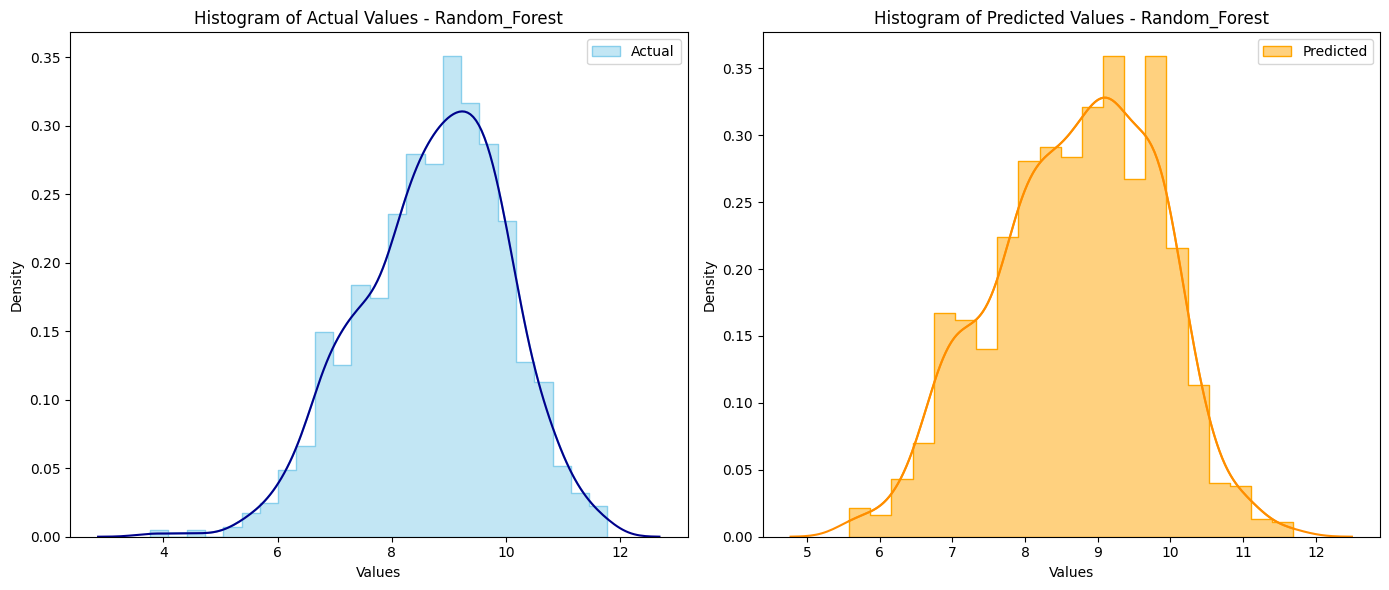

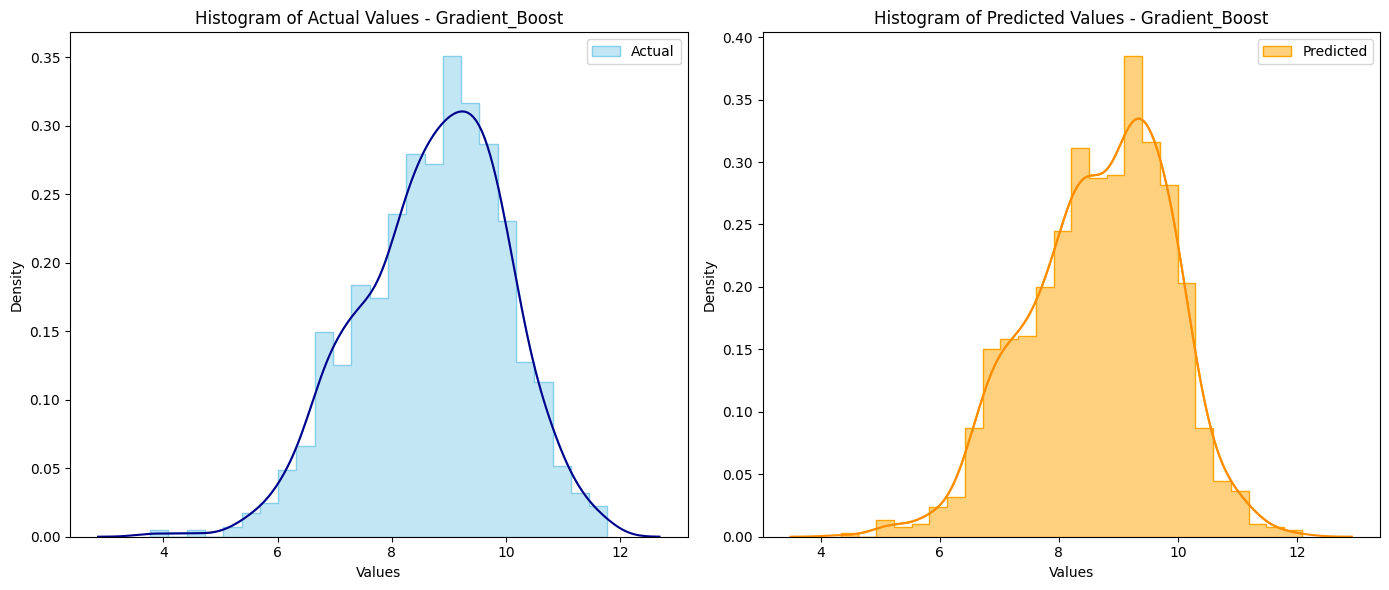

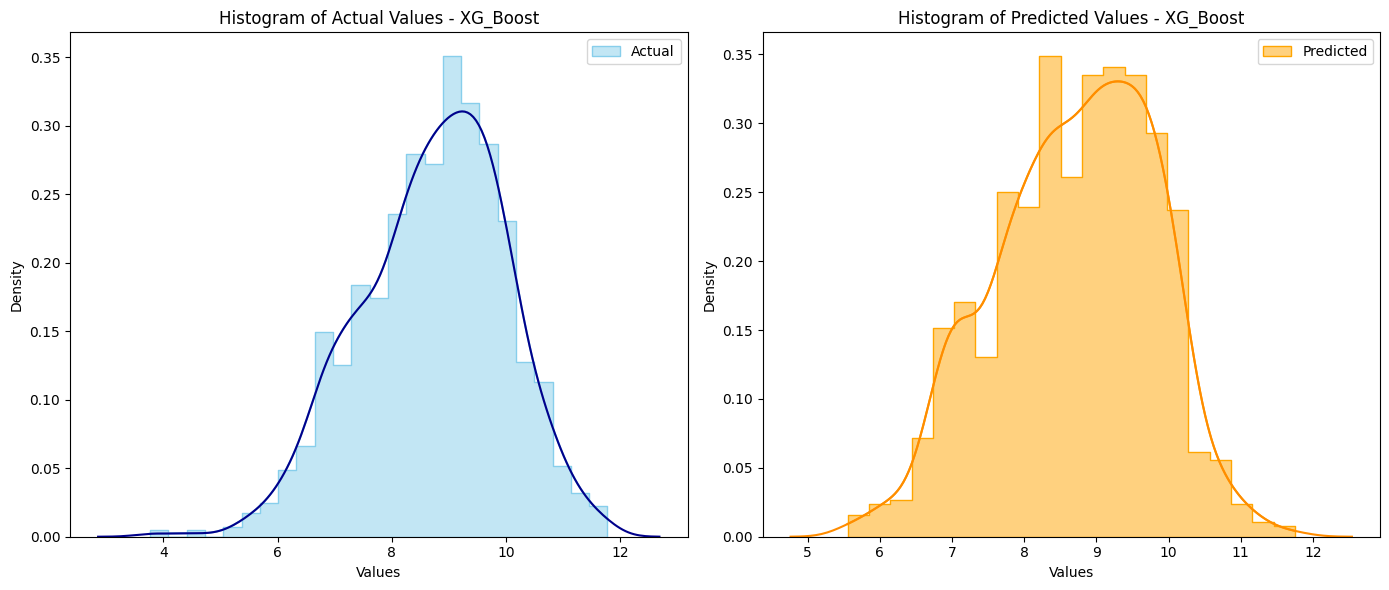

In [175]:
def plot_actual_vs_predicted_histogram(result_data, Model):
    # Create a new DataFrame with 'y_test' and 'y_pred'
    data_to_plot = pd.DataFrame({'Actual': result_data['y_test'], 'Predicted': result_data['y_pred']})

    # Set up a grid for better layout
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Plot Actual values histogram with KDE
    sns.histplot(data_to_plot['Actual'], kde=True, element="step", stat="density",
                 color='skyblue', ax=ax1, label='Actual')
    sns.kdeplot(data_to_plot['Actual'], color='darkblue', ax=ax1)
    ax1.set_title(f'Histogram of Actual Values - {Model}')
    ax1.set_xlabel('Values')
    ax1.set_ylabel('Density')
    ax1.legend()

    # Plot Predicted values histogram with KDE
    sns.histplot(data_to_plot['Predicted'], kde=True, element="step", stat="density",
                 color='orange', ax=ax2, label='Predicted')
    sns.kdeplot(data_to_plot['Predicted'], color='darkorange', ax=ax2)
    ax2.set_title(f'Histogram of Predicted Values - {Model}')
    ax2.set_xlabel('Values')
    ax2.set_ylabel('Density')
    ax2.legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

plot_actual_vs_predicted_histogram(result_data_rf,Model="Random_Forest")
plot_actual_vs_predicted_histogram(result_data_gb,Model='Gradient_Boost')
plot_actual_vs_predicted_histogram(result_data_xgb,Model='XG_Boost')

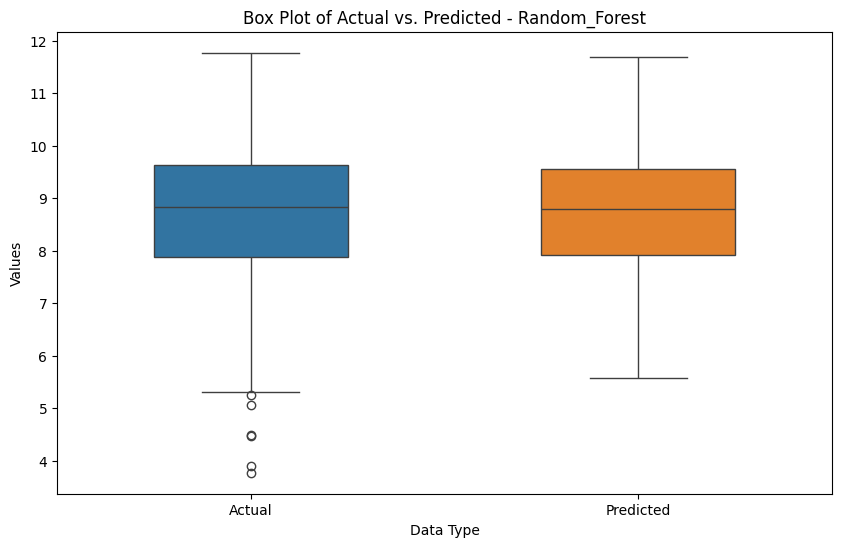

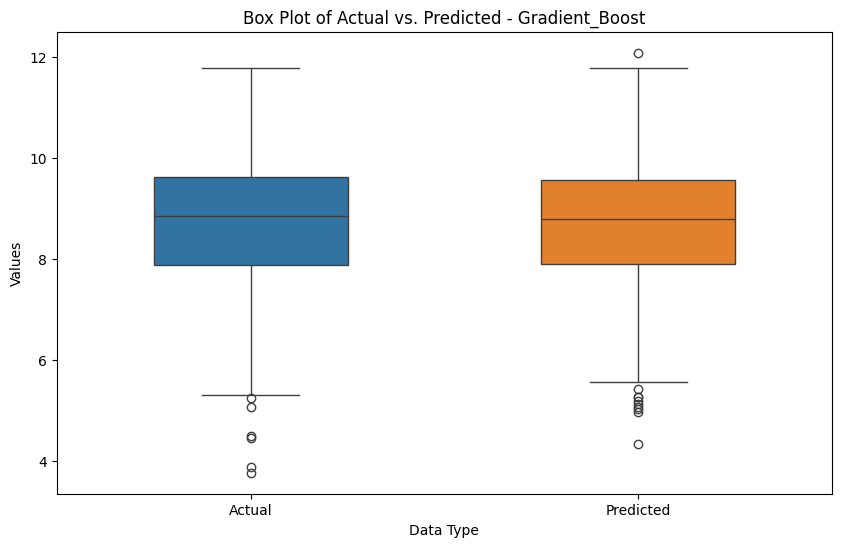

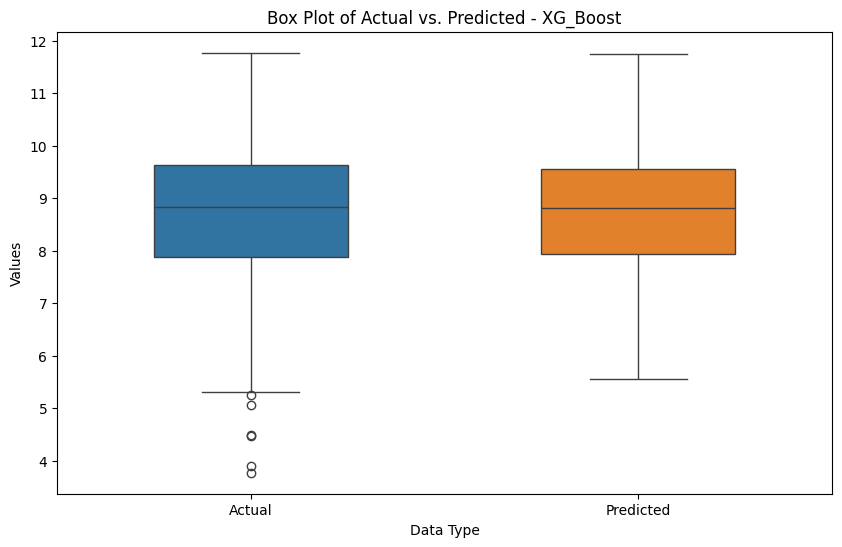

In [166]:
def plot_actual_vs_predicted_boxplot(result_data, Model):
    # Create a new DataFrame with 'y_test' and 'y_pred'
    data_to_plot = pd.DataFrame({'Actual': result_data['y_test'], 'Predicted': result_data['y_pred']})

    # Use Seaborn to create a box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data_to_plot, width=0.5)
    plt.title(f'Box Plot of Actual vs. Predicted - {Model}')
    plt.xlabel('Data Type')
    plt.ylabel('Values')
    plt.show()

# Example usage with different models
plot_actual_vs_predicted_boxplot(result_data_rf, Model="Random_Forest")
plot_actual_vs_predicted_boxplot(result_data_gb, Model='Gradient_Boost')
plot_actual_vs_predicted_boxplot(result_data_xgb, Model='XG_Boost')

In [169]:
# Create a Voting Regressor
voting_regressor = VotingRegressor(estimators=[
    ('Random Forest', best_rf_model),
    ('Gradient Boosting', best_gb_model),
    ('XGBoost', best_xgb_model)
])

# Train the Voting Regressor
voting_regressor.fit(X_train_transformed, y_train_transformed)

# Make predictions on the test set using the Voting Regressor
y_pred_voting = voting_regressor.predict(X_test_transformed)

# Evaluate the Voting Regressor using R2 score
r2_voting = r2_score(y_test_transformed, y_pred_voting)
result_data_voting = pd.DataFrame({'y_test': y_test_transformed, 'y_pred': y_pred_voting})

print("R2 Score on Test Set for Voting Regressor:", r2_voting)

R2 Score on Test Set for Voting Regressor: 0.7921212191455285


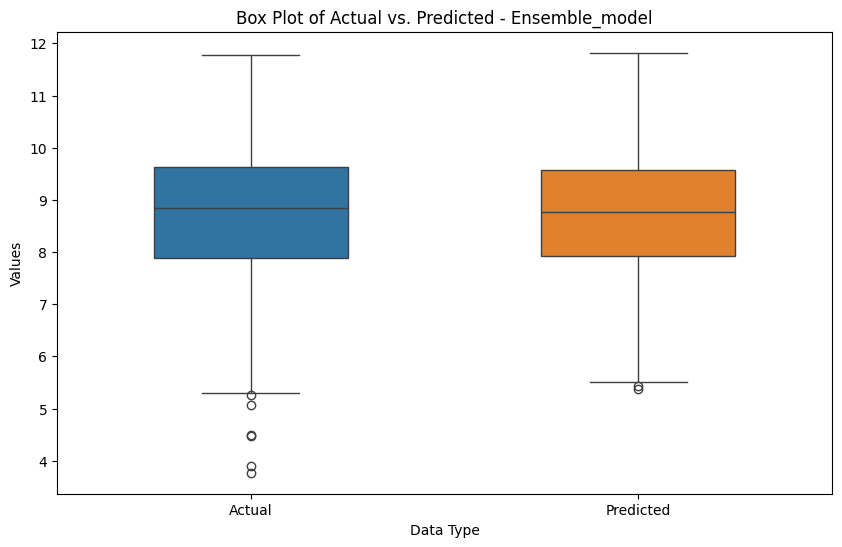

In [170]:

plot_actual_vs_predicted_boxplot(result_data_voting, Model="Ensemble_model")

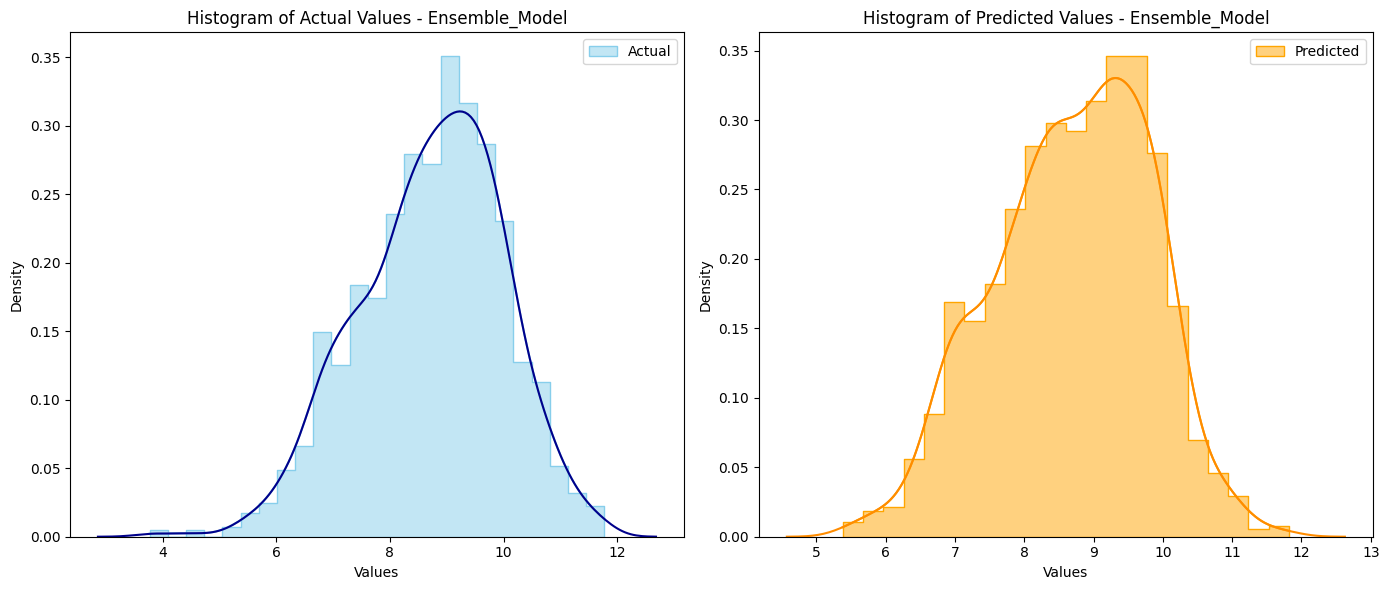

In [176]:
plot_actual_vs_predicted_histogram(result_data_voting,Model='Ensemble_Model')